In [1]:
%load_ext autoreload
%autoreload 2
# You can load your python module as this:
import dataproject.example

In [2]:
dataproject.example.hello_world()

'hello world'

In [1]:
# Import varios packages used in the Project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Fetching data from Statistics Denmark using an API
import pydst
dst = pydst.Dst(lang='da')

In [2]:
# Import data from excel
#raw download from DST
# note: the file must be in a sub folder "data" to the folder where jupyter was launched
import os 
os.listdir('./data/')
# define filename refering to the path of the file.
filename = './Data/NGLK.xlsx'

In [3]:
# A quick overview of the data
pd.read_excel(filename).head(10)

,"Udvalgte kommunale regnskabstal efter prisenhed, brutto-/nettoudgifter, nøgletal, område og tid",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Enhed: kr.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
2,Faste priser,Nettoudgifter,Langfristet gæld pr. indbygger,Hele landet,16382.0,16155.0,16498.0,16042.0,16095.0,16212.0,15967.0,15569.0,15151.0,14423.0
3,NaN,NaN,NaN,Region Hovedstaden,17544.0,16796.0,16901.0,15467.0,15078.0,14810.0,14236.0,13409.0,12905.0,11996.0
4,NaN,NaN,NaN,København,11915.0,10231.0,9718.0,6325.0,5583.0,4891.0,4307.0,3679.0,3208.0,2733.0
5,NaN,NaN,NaN,Frederiksberg,27854.0,27004.0,25761.0,24948.0,22782.0,21930.0,20169.0,18352.0,16920.0,15149.0
6,NaN,NaN,NaN,Dragør,15967.0,15822.0,16593.0,19763.0,22697.0,26398.0,25610.0,23476.0,21753.0,17913.0
7,NaN,NaN,NaN,Tårnby,81.0,65.0,83.0,64.0,50.0,38.0,23.0,14.0,9.0,4.0
8,NaN,NaN,NaN,Albertslund,18134.0,17701.0,21268.0,21147.0,20360.0,19149.0,18604.0,18208.0,24843.0,24184.0
9,NaN,NaN,NaN,Ballerup,17307.0,16852.0,19293.0,18442.0,17451.0,15825.0,15222.0,14282.0,13608.0,12884.0


In [4]:
# Getting the right columns and rows

#a) Skip first 3 rows
gaeld = pd.read_excel(filename, skiprows=2)
gaeld.head(10)

# b) The first couple of columns are not needed and contain only missing values (denoted by NaN (Not a Number)), 
#so we will drop those.
drop_these = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2']
gaeld.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
gaeld.head(10)

# c) We rename the first column 'Unnamed: 3'
gaeld.rename(columns = {'Unnamed: 3':'municipality'}, inplace=True)
gaeld.head(10)



,municipality,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Hele landet,16382.0,16155.0,16498.0,16042.0,16095.0,16212.0,15967.0,15569.0,15151.0,14423.0
1,Region Hovedstaden,17544.0,16796.0,16901.0,15467.0,15078.0,14810.0,14236.0,13409.0,12905.0,11996.0
2,København,11915.0,10231.0,9718.0,6325.0,5583.0,4891.0,4307.0,3679.0,3208.0,2733.0
3,Frederiksberg,27854.0,27004.0,25761.0,24948.0,22782.0,21930.0,20169.0,18352.0,16920.0,15149.0
4,Dragør,15967.0,15822.0,16593.0,19763.0,22697.0,26398.0,25610.0,23476.0,21753.0,17913.0
5,Tårnby,81.0,65.0,83.0,64.0,50.0,38.0,23.0,14.0,9.0,4.0
6,Albertslund,18134.0,17701.0,21268.0,21147.0,20360.0,19149.0,18604.0,18208.0,24843.0,24184.0
7,Ballerup,17307.0,16852.0,19293.0,18442.0,17451.0,15825.0,15222.0,14282.0,13608.0,12884.0
8,Brøndby,12746.0,11929.0,13193.0,14653.0,14787.0,14879.0,14254.0,13568.0,11823.0,10958.0
9,Gentofte,8582.0,7845.0,8191.0,8233.0,7771.0,12203.0,16682.0,17753.0,18088.0,19172.0


We also see that the longterm debt. pr. capitta in 2008 has been named 2008. Having a variable that is named a number can cause problems with some functions (and many other programming languages do not even allow it), so let us change their names. To do so, we need to create a dictionary that maps each of the years {2008, ..., 2017} to {g2008, ..., g2017}.

In [5]:
myDict = {}
for i in range(2008, 2018): # range goes from 2008 to but not including 2018
    myDict[str(i)] = f'g{i}' 
myDict

{'2008': 'g2008',
 '2009': 'g2009',
 '2010': 'g2010',
 '2011': 'g2011',
 '2012': 'g2012',
 '2013': 'g2013',
 '2014': 'g2014',
 '2015': 'g2015',
 '2016': 'g2016',
 '2017': 'g2017'}

In [6]:
gaeld.rename(columns = myDict, inplace=True)
gaeld.head(10)

,municipality,g2008,g2009,g2010,g2011,g2012,g2013,g2014,g2015,g2016,g2017
0,Hele landet,16382.0,16155.0,16498.0,16042.0,16095.0,16212.0,15967.0,15569.0,15151.0,14423.0
1,Region Hovedstaden,17544.0,16796.0,16901.0,15467.0,15078.0,14810.0,14236.0,13409.0,12905.0,11996.0
2,København,11915.0,10231.0,9718.0,6325.0,5583.0,4891.0,4307.0,3679.0,3208.0,2733.0
3,Frederiksberg,27854.0,27004.0,25761.0,24948.0,22782.0,21930.0,20169.0,18352.0,16920.0,15149.0
4,Dragør,15967.0,15822.0,16593.0,19763.0,22697.0,26398.0,25610.0,23476.0,21753.0,17913.0
5,Tårnby,81.0,65.0,83.0,64.0,50.0,38.0,23.0,14.0,9.0,4.0
6,Albertslund,18134.0,17701.0,21268.0,21147.0,20360.0,19149.0,18604.0,18208.0,24843.0,24184.0
7,Ballerup,17307.0,16852.0,19293.0,18442.0,17451.0,15825.0,15222.0,14282.0,13608.0,12884.0
8,Brøndby,12746.0,11929.0,13193.0,14653.0,14787.0,14879.0,14254.0,13568.0,11823.0,10958.0
9,Gentofte,8582.0,7845.0,8191.0,8233.0,7771.0,12203.0,16682.0,17753.0,18088.0,19172.0


Now we choose to drope observations that are not actually municipalities

The dataset contains observations like "Region Hovedstaden", which is not a municipality so we want to drop such rows. To do this, we can use the df['var'].str functionalities, in particular df['var'].str.contains('PATTERN'). These rows are then deleted


In [7]:
for val in ['Region', 'Landsdel']: 
    I = gaeld.municipality.str.contains(val)
    gaeld = gaeld.loc[I == False] # keep everything else

In [8]:
gaeld.head(10)

,municipality,g2008,g2009,g2010,g2011,g2012,g2013,g2014,g2015,g2016,g2017
0,Hele landet,16382.0,16155.0,16498.0,16042.0,16095.0,16212.0,15967.0,15569.0,15151.0,14423.0
2,København,11915.0,10231.0,9718.0,6325.0,5583.0,4891.0,4307.0,3679.0,3208.0,2733.0
3,Frederiksberg,27854.0,27004.0,25761.0,24948.0,22782.0,21930.0,20169.0,18352.0,16920.0,15149.0
4,Dragør,15967.0,15822.0,16593.0,19763.0,22697.0,26398.0,25610.0,23476.0,21753.0,17913.0
5,Tårnby,81.0,65.0,83.0,64.0,50.0,38.0,23.0,14.0,9.0,4.0
6,Albertslund,18134.0,17701.0,21268.0,21147.0,20360.0,19149.0,18604.0,18208.0,24843.0,24184.0
7,Ballerup,17307.0,16852.0,19293.0,18442.0,17451.0,15825.0,15222.0,14282.0,13608.0,12884.0
8,Brøndby,12746.0,11929.0,13193.0,14653.0,14787.0,14879.0,14254.0,13568.0,11823.0,10958.0
9,Gentofte,8582.0,7845.0,8191.0,8233.0,7771.0,12203.0,16682.0,17753.0,18088.0,19172.0
10,Gladsaxe,15029.0,17502.0,16413.0,18620.0,18505.0,18908.0,18733.0,17289.0,18022.0,16841.0


Summary statistics

To get an overview of longterm debt pr. capita across municipalities we can use the function df.describe(). Note that each observation (municipality) is weighted equally.

In [9]:
gaeld.describe()

,g2008,g2009,g2010,g2011,g2012,g2013,g2014,g2015,g2016,g2017
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,18364.434343,18244.565657,18778.727273,18628.070707,18736.585859,18958.525253,19541.858586,19212.767677,18593.090909,17699.232323
std,10676.542728,10022.645718,10672.758464,10105.695715,9679.024038,9564.362815,13504.342918,14308.529490,13909.385898,13136.675894
min,81.000000,65.000000,83.000000,64.000000,50.000000,38.000000,23.000000,14.000000,9.000000,4.000000
25%,12716.000000,12467.500000,13072.000000,13004.000000,13364.500000,13560.000000,13354.500000,13288.500000,12805.000000,12119.500000
50%,16258.000000,16782.000000,16421.000000,17313.000000,17122.000000,17490.000000,17370.000000,17191.000000,16826.000000,15418.000000
75%,21138.000000,21913.000000,21845.500000,21137.500000,21291.500000,21952.000000,21261.500000,21399.000000,20831.500000,20554.500000
max,89892.000000,84360.000000,89616.000000,85807.000000,82394.000000,79657.000000,118038.000000,129930.000000,126416.000000,117540.000000


And to get a picture of the mean debt pr. capita pr. year

In [10]:
gaeld.mean()

g2008    18364.434343
g2009    18244.565657
g2010    18778.727273
g2011    18628.070707
g2012    18736.585859
g2013    18958.525253
g2014    19541.858586
g2015    19212.767677
g2016    18593.090909
g2017    17699.232323
dtype: float64

Transforming the data set from wide to long: In general, Pandas will assume that the variables in the wide format have a particular structure: namely they are of the form XPERIOD, where X is called the "stub". In our case, the variable names are e.g. g2011, so the stub is 'g' and the period (for that variable) is 2011.

In [11]:
gaeld_tall = pd.wide_to_long(gaeld, stubnames='g', i='municipality', j='year')
gaeld_tall.head(10)

,,g
municipality,year,
Hele landet,2008,16382.0
København,2008,11915.0
Frederiksberg,2008,27854.0
Dragør,2008,15967.0
Tårnby,2008,81.0
Albertslund,2008,18134.0
Ballerup,2008,17307.0
Brøndby,2008,12746.0
Gentofte,2008,8582.0


Note: The variables municipality and year are now in the index. We see that because they are "below" g in the head overview. We now reset the index.

In [12]:
gaeld_tall = gaeld_tall.reset_index()
gaeld_tall.head(10)

,municipality,year,g
0,Hele landet,2008,16382.0
1,København,2008,11915.0
2,Frederiksberg,2008,27854.0
3,Dragør,2008,15967.0
4,Tårnby,2008,81.0
5,Albertslund,2008,18134.0
6,Ballerup,2008,17307.0
7,Brøndby,2008,12746.0
8,Gentofte,2008,8582.0
9,Gladsaxe,2008,15029.0


Plotting the longterm debt pr. capita for the whole country using the builtin pandas plot function.

In [13]:
gaeld_tall['municipality2']=gaeld_tall['municipality']
gaeld_tall

,municipality,year,g,municipality2
0,Hele landet,2008,16382.0,Hele landet
1,København,2008,11915.0,København
2,Frederiksberg,2008,27854.0,Frederiksberg
3,Dragør,2008,15967.0,Dragør
4,Tårnby,2008,81.0,Tårnby
5,Albertslund,2008,18134.0,Albertslund
6,Ballerup,2008,17307.0,Ballerup
7,Brøndby,2008,12746.0,Brøndby
8,Gentofte,2008,8582.0,Gentofte
9,Gladsaxe,2008,15029.0,Gladsaxe


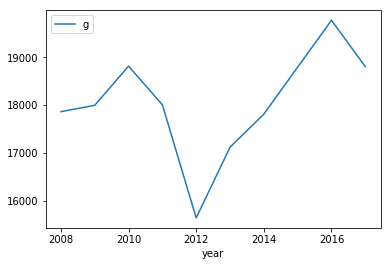

In [14]:
gaeld_tall.loc[gaeld_tall['municipality2'] == 'Køge', :].plot(x='year',y='g'); 

And plotting the same figure interactively for each municipality

In [38]:
# a) Import the relevant package
import ipywidgets as widgets

# define af simple function
def plot_e(dataframe, municipality,municipality2): 
    I = dataframe['municipality'] == municipality
    J = dataframe['municipality2'] == municipality2  
    ax_left=dataframe.loc[I,:].plot(x='year', y='g', style='-o', legend='False')
    ax_right=dataframe.loc[J,:].plot(x='year', y='g', style='-o', legend='False')
    ax_left.set_title('Long-term debt pr. capita in the municipality')
    ax_left.set_ylabel('Long-term debt pr. capita (kr.)')
    ax_right.set_title('(Net) Long-term debt pr. capita in the municipality')
    ax_right.set_ylabel('(Net) Long-term debt pr. capita (kr.)')

In [39]:
# b) creating the interactively plot
widgets.interact(plot_e, 
    dataframe = widgets.fixed(gaeld_tall),            
    municipality = widgets.Dropdown(description='Municipality1', options=gaeld_tall.municipality.unique(), value='København'),
    municipality2 = widgets.Dropdown(description='Municipality2', options=gaeld_tall.municipality2.unique(), value='Lejre')             
);

interactive(children=(Dropdown(description='Municipality1', index=1, options=('Hele landet', 'København', 'Fre…

Note få den anden slider til at virke.